### Learning to use ANNData


In [4]:
from hest import iter_hest
id = ["MISC12"]
sample = iter_hest("../hest_data",id_list = id).__next__()
print(dict(sample.meta))

{'pixel_size_um_embedded': nan, 'pixel_size_um_estimated': 0.7251346907927791, 'fullres_height': 13332, 'fullres_width': 13332, 'spots_under_tissue': 4226, 'spot_estimate_dist': 49, 'spot_diameter': 55.0, 'inter_spot_dist': 100.0, 'adata_nb_col': 33538, 'fullres_px_width': 13332, 'fullres_px_height': 13332, 'dataset_title': 'spatialLIBD', 'id': 'MISC12', 'image_filename': 'MISC12.tif', 'organ': 'Brain', 'disease_state': 'Healthy', 'oncotree_code': nan, 'species': 'Homo sapiens', 'patient': '   ', 'st_technology': 'Visium', 'data_publication_date': nan, 'license': nan, 'study_link': 'https://www.nature.com/articles/s41593-020-00787-0#data-availability', 'download_page_link1': 'https://github.com/LieberInstitute/spatialLIBD#raw-data', 'preservation_method': 'Fresh Frozen', 'nb_genes': 33538, 'treatment_comment': nan, 'magnification': '20x', 'tissue': 'dorsolateral prefrontal cortex', 'disease_comment': nan, 'subseries': '151507'}


sample id is under ```subseries``` key

In [5]:
sample.adata

AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'pxl_col_in_fullres', 'pxl_row_in_fullres', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mito'
    uns: 'spatial'
    obsm: 'spatial'

In [10]:
import numpy as np
sample.adata.obs


,in_tissue,array_row,array_col,pxl_col_in_fullres,pxl_row_in_fullres,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mito,log1p_total_counts_mito,pct_counts_mito
AAACAACGAATAGTTC-1,True,0,16,3249.031938,2512.854235,727,6.590301,948.0,6.855409,22.362869,32.911392,44.409283,76.054852,88.0,4.488636,9.282701
AAACAAGTATCTCCCA-1,True,50,102,9162.986010,8519.612782,2170,7.682943,4261.0,8.357493,24.994133,31.471486,40.154893,56.817648,657.0,6.489205,15.418916
AAACAATCTACTAGCA-1,True,3,43,5109.786098,2878.804837,1093,6.997596,1969.0,7.585789,34.128999,42.001016,52.158456,69.883189,431.0,6.068426,21.889284
AAACACCAATAACTGC-1,True,59,19,3437.081174,9575.825642,1896,7.548029,3368.0,8.122372,22.446556,29.928741,39.994062,58.491686,272.0,5.609472,8.076009
AAACAGCTTTCAGAAG-1,True,43,9,2752.659111,7658.111165,1620,7.390799,2981.0,8.000349,27.172090,34.149614,44.112714,62.428715,502.0,6.220590,16.839987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,True,31,77,7445.236664,6238.994456,1320,7.186144,2337.0,7.757051,30.851519,38.040223,47.411211,64.912281,489.0,6.194406,20.924261
TTGTTTCACATCCAGG-1,True,58,42,5023.301459,9461.966780,1444,7.275865,2331.0,7.754481,22.779923,30.072930,40.669241,59.502360,288.0,5.666427,12.355212
TTGTTTCATTAGTCTA-1,True,60,30,4195.237040,9698.316968,629,6.445720,819.0,6.709304,25.030525,35.409035,47.619048,84.249084,73.0,4.304065,8.913309
TTGTTTCCATACAACT-1,True,45,27,3993.161885,7902.078233,1697,7.437206,3092.0,8.036897,25.582147,32.794308,42.658473,61.287193,462.0,6.137727,14.941785


* Each row is a spot
* each column is a gene?

In [13]:
sample.adata.X[0,:].max()

np.float32(16.0)

In [14]:
sample.adata.var

,gene_ids,feature_types,genome,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,mito
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,1,0.000237,0.000237,99.976337,1.0,0.693147,False
FAM138A,ENSG00000237613,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False
OR4F5,ENSG00000186092,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,6,0.001420,0.001419,99.858022,6.0,1.945910,False
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False
...,...,...,...,...,...,...,...,...,...,...
AC233755.2,ENSG00000277856,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False
AC233755.1,ENSG00000275063,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False
AC240274.1,ENSG00000271254,Gene Expression,GRCh38,6,0.001420,0.001419,99.858022,6.0,1.945910,False
AC213203.1,ENSG00000277475,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False


/home/isaac/dev/sfu/cmpt415/HEST/src/hest/HESTData.py:1381: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  fig = sc.pl.spatial(adata, show=False, img_key="downscaled_fullres", color=[key], title=f"in_tissue spots", return_fig=True, **pl_kwargs)


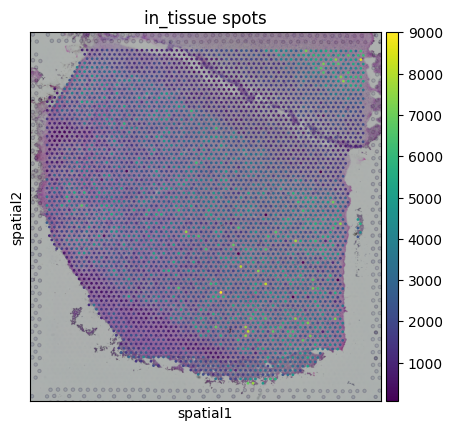

In [16]:
import squidpy as sq
sample.save_spatial_plot('.')

In [ ]:
sample.segment_tissue(method='otsu') 
sample.save_tissue_seg_pkl(save_dir, name)